# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [4]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")

df_census = pd.read_csv(adultDataSet_filename)
df_whr = pd.read_csv(WHRDataSet_filename)

df = df_census
# df = df_whr

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

Answer:
1. I have chosen the Census Dataset.
2. I will be predicting whether an individual earns more or less than \$50k per year. The label (target variable) is the income column.
3. It is a supervised learning problem as the model is trained on labeled data. It is a classification problem (binary) as there are only two possible outcomes for the income level (more or less than $50k).
4. The features will include all columns except for the label (income). 
5. By predicting income level based on demographic and occupational attributes, companies can create value in multiple ways. For example, financial institutions can use income prediction models for credit risk assessment, loan approvals, or targeted financial products. Marketing and e-commerce platforms can use income estimates to personalize offerings and deliver more relevant and personalized ads. 

Originally, I was also interested in comparing this problem with predicting a country’s Happiness Score (WHR) using economic and social indicators. My broader goal was to explore whether drivers of individual income (like education or occupation) could be linked to broader indicators of national happiness. 
- Does more education lead to higher income and therefore more life satisfaction?
- Do countries with higher happiness scores also tend to have population-level characteristics such as higher education attainment or greater income levels?

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [76]:
print("Data Info:")
df.info()

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nSummary statistics for numerical columns:")
print(df.describe())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32399 non-null  float64
 1   workclass       30725 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   32561 non-null  int64  
 5   marital-status  32561 non-null  object 
 6   occupation      30718 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex_selfID      32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32236 non-null  float64
 13  native-country  31978 non-null  object 
 14  income_binary   32561 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 3.7+ MB

Missing values per column:
age                162
wo


Income class distribution:
<=50K    24720
>50K      7841
Name: income_binary, dtype: int64


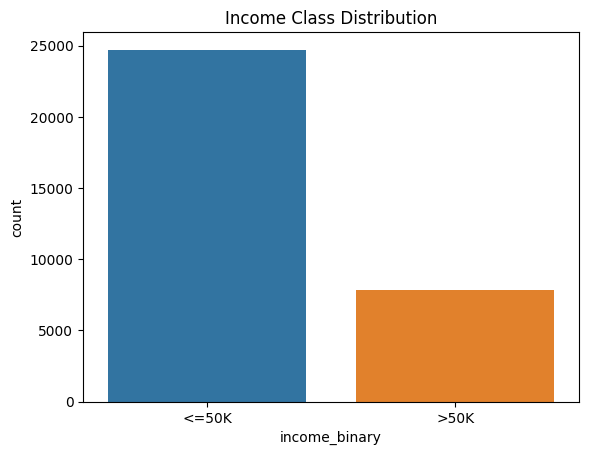

In [77]:
# Target Distribution
print("\nIncome class distribution:")
print(df['income_binary'].value_counts())

sns.countplot(x='income_binary', data=df)
plt.title("Income Class Distribution")
plt.show()

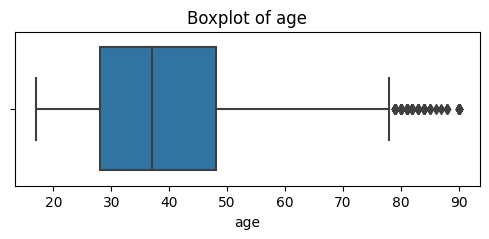

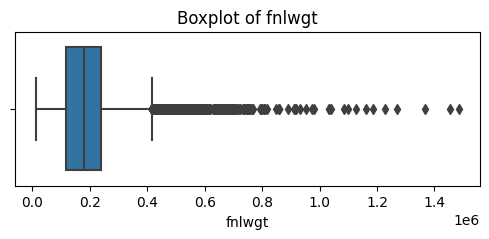

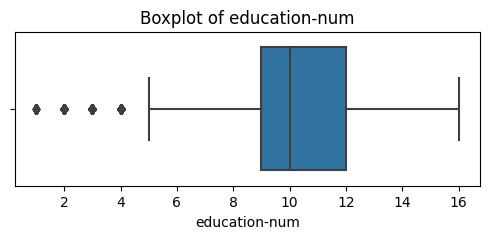

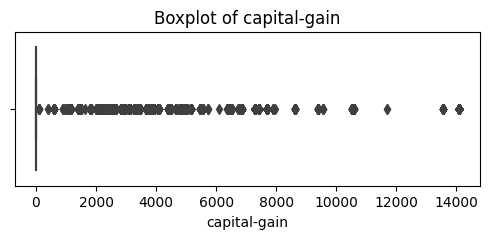

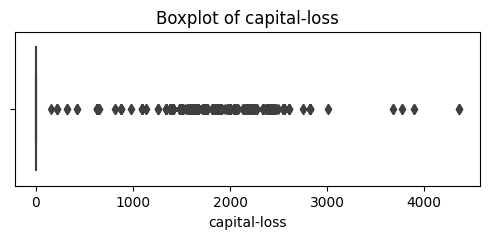

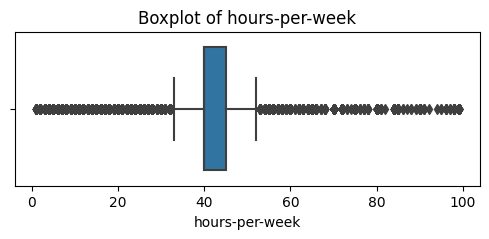

In [78]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=col, data=df)
    plt.title(f"Boxplot of {col}")
    plt.show()

In [79]:
print("Missing values before handling:")
print(df.isnull().sum())

df_clean = df.dropna()

selected_features = [
    'age', 'education-num', 'hours-per-week',
    'workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID', 'native-country'
]

df_clean = df_clean[selected_features + ['income_binary']]

print("Missing values after dropping rows with missing values:")
print(df_clean.isnull().sum())

Missing values before handling:
age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64
Missing values after dropping rows with missing values:
age               0
education-num     0
hours-per-week    0
workclass         0
marital-status    0
occupation        0
relationship      0
race              0
sex_selfID        0
native-country    0
income_binary     0
dtype: int64


In [80]:
X = df_clean.drop('income_binary', axis=1) 
y = df_clean['income_binary']

In [81]:
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

Numeric columns: ['age', 'education-num', 'hours-per-week']
Categorical columns: ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID', 'native-country']


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

After exploring the Census dataset, I selected demographic and job-related features such as age, years of education, hours worked per week, workclass, marital status, occupation, relationship, race, sex, and native country. I handled missing data by dropping rows containing missing values. Categorical variables were one-hot encoded, and numeric features were scaled to prepare the data for modeling. I plan to use Logistic Regression as a baseline model and Random Forest to improve performance, tuning hyperparameters with GridSearchCV. Models will be trained using cross-validation, evaluated with classification metrics like accuracy and ROC AUC, analyzed via confusion matrices, and iteratively improved through feature selection and hyperparameter tuning.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [83]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_prepared = preprocessor.fit_transform(X)

print("Preprocessed feature matrix shape:", X_prepared.shape)

Preprocessed feature matrix shape: (29716, 85)


In [84]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)


Training set size: 23772 samples
Test set size: 5944 samples


Classification Report:
              precision    recall  f1-score   support

       <=50K       0.86      0.92      0.89      4464
        >50K       0.70      0.56      0.62      1480

    accuracy                           0.83      5944
   macro avg       0.78      0.74      0.75      5944
weighted avg       0.82      0.83      0.82      5944

Confusion Matrix:


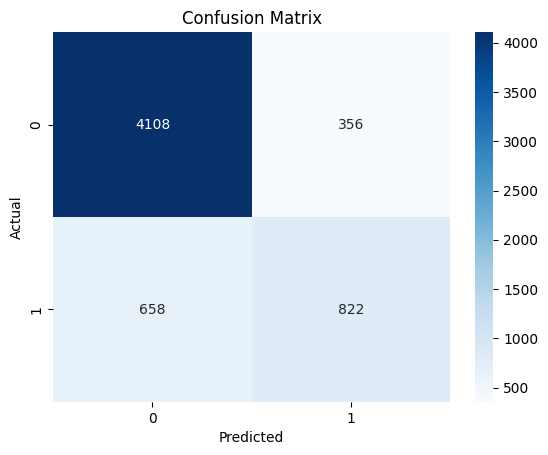

ROC AUC Score: 0.8840


In [87]:
# Train Logistic Regression (baseline)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_prepared, y_train)

y_pred = model.predict(X_test_prepared)
y_proba = model.predict_proba(X_test_prepared)[:,1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

In [88]:
# Try Random Forest with GridSearchCV (hyperparameter tuning)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_prepared, y_train)

print(f"Best params: {grid_search.best_params_}")
print(f"Best ROC AUC (CV): {grid_search.best_score_:.4f}")

best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test_prepared)
y_proba_rf = best_rf.predict_proba(X_test_prepared)[:,1]

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f"Random Forest ROC AUC Score: {roc_auc_rf:.4f}")

Best params: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Best ROC AUC (CV): 0.8881
Random Forest Classification Report:
              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90      4464
        >50K       0.72      0.57      0.64      1480

    accuracy                           0.84      5944
   macro avg       0.79      0.75      0.77      5944
weighted avg       0.83      0.84      0.83      5944

Random Forest ROC AUC Score: 0.8894


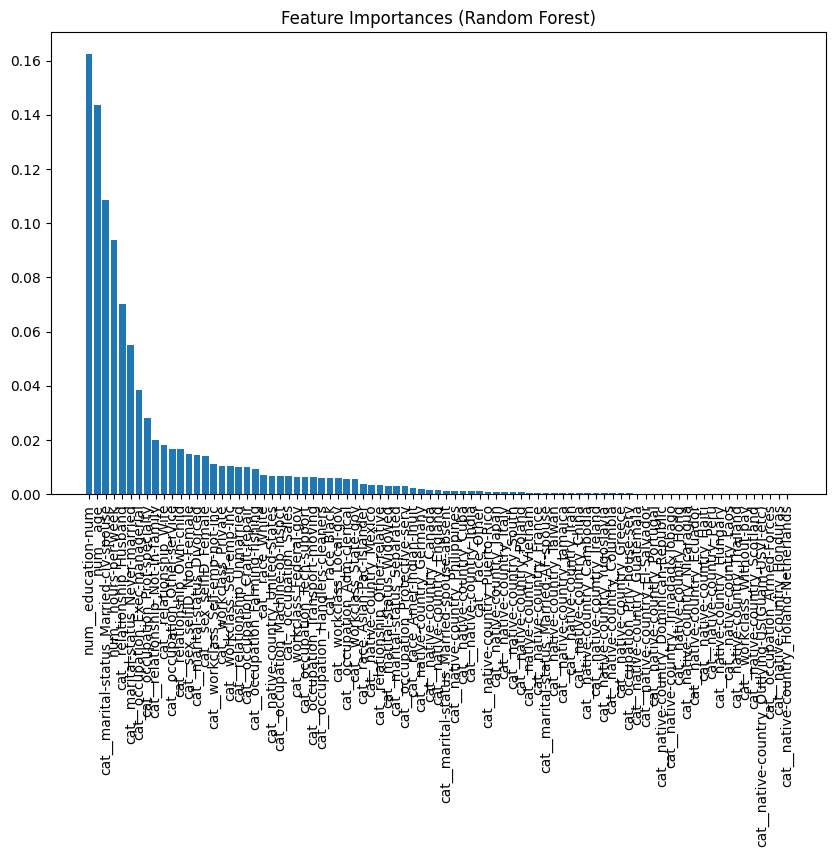

In [89]:
# Plot feature importance from RF
importances = best_rf.feature_importances_
feature_names = preprocessor.get_feature_names_out()

sorted_idx = np.argsort(importances)[::-1]
plt.figure(figsize=(10,6))
plt.bar(range(len(importances)), importances[sorted_idx], align='center')
plt.xticks(range(len(importances)), np.array(feature_names)[sorted_idx], rotation=90)
plt.title("Feature Importances (Random Forest)")
plt.show()

I first trained a Logistic Regression model on the Census dataset, achieving a ROC AUC score of 0.8840. The classification report and confusion matrix showed decent precision and recall, especially for the `<=50K income class`.

Next, I applied a Random Forest classifier with hyperparameter tuning via GridSearchCV. The best model had parameters: `max_depth=20`, `min_samples_split=5`, and `n_estimators=100`, achieving a slightly improved ROC AUC score of 0.8894 on the test set. The Random Forest model showed better overall performance, especially in balancing precision and recall.

As I reduced the feature set to focus on key demographic and job-related variables, the ROC AUC scores dropped slightly compared to models trained on a larger feature set (~0.91), which is expected due to less input information. However, this streamlined feature selection improves model interpretability and reduces noise, which can be valuable in practical applications.

Overall, the Random Forest model provides a good balance of accuracy and robustness for predicting income levels based on census data.